In [10]:
from dolfin import *
%matplotlib inline

# Set up the boundary conditions and the operator

Consider a unit square with the following:
$$
L u = f
$$
where
$$
L = \begin{bmatrix}I & -\nabla\\ -\nabla \cdot & 0\\ \nabla\times & 0\end{bmatrix}
$$

In [11]:
def boundaryAll(x):
    p1 = (abs(x[0]) < DOLFIN_EPS)
    p2 = (abs(x[0]-1.0) < DOLFIN_EPS)
    p3 = (abs(x[1]) < DOLFIN_EPS)
    p4 = (abs(x[1]-1.0) < DOLFIN_EPS)
    return p1 or p2 or p3 or p4


def boundaryNorthSouth(x):
    p3 = (abs(x[1]) < DOLFIN_EPS)
    p4 = (abs(x[1]-1.0) < DOLFIN_EPS)
    return p3 or p4


def boundaryWestEast(x):
    p1 = (abs(x[0]) < DOLFIN_EPS)
    p2 = (abs(x[0]-1.0) < DOLFIN_EPS)
    return p1 or p2


def LSop(q, u):
    a1 = q - grad(u)
    a2 = -div(q)
    a3 = curl(q)
    return [a1, a2, a3]

# Pick the mesh and the space

In [18]:
mesh = UnitSquareMesh(30, 30)

pV = 2
Vv = VectorElement('CG', mesh.ufl_cell(), pV)
Vs = FiniteElement('CG', mesh.ufl_cell(), pV)
V = FunctionSpace(mesh, Vv * Vs)
(q, u) = TrialFunctions(V)
(psi, phi) = TestFunctions(V)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


# Set the weak form and boundary conditions

In [19]:
g = Constant(0)

# f = [0,1,0]
Lu = LSop(q, u)
Lv = LSop(psi, phi)
a = dot(Lu[0], Lv[0])*dx + Lu[1]*Lv[1]*dx + dot(Lu[2], Lv[2])*dx
L = Lv[1]*dx

# boundary conditions:
# n x q = 0
# u = 0
bc_qx = DirichletBC(V.sub(0).sub(0), g, boundaryNorthSouth)
bc_qy = DirichletBC(V.sub(0).sub(1), g, boundaryWestEast)
bc_u = DirichletBC(V.sub(1),        g, boundaryAll)
bc = [bc_qx, bc_qy, bc_u]

# Assemble and solve

In [20]:
A = assemble(a)
rhs = assemble(L)
for condition in bc:
    condition.apply(A, rhs)

QU = Function(V)
solve(A, QU.vector(), rhs)

(Q, U) = QU.split()

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


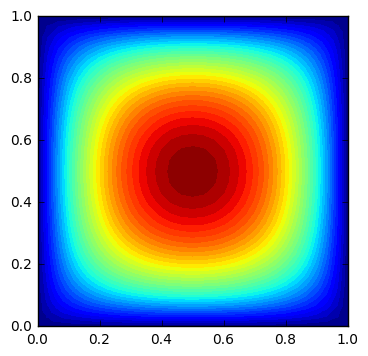

In [22]:
plot(U, interactive=True)